### Importing modules

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 50)

### Loading Data

In [2]:
battles = pd.read_csv('battles.csv')
char_deaths = pd.read_csv('character-deaths.csv')
char_pred = pd.read_csv('character-predictions.csv')

In [3]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [4]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [5]:
char_deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


## Data Exploration

Since our task is to predict characters death. We will focus on Character dataset

In [56]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [58]:
# viewing age properties
char_pred['age'].describe()

count    433.000000
mean      36.704388
std       25.822317
min        0.000000
25%       18.000000
50%       27.000000
75%       50.000000
max      100.000000
Name: age, dtype: float64

There are negative value for date of birth. Negative mean for age.
Let's investigate that.

Research was made and according to [Fandom.com](https://gameofthrones.fandom.com/wiki/Doreah) Doreah is 25 years old.

According to [Fanthom.com](https://gameofthrones.fandom.com/wiki/Rhaego) Rhaego was never born.

### Feature Engineering


In [85]:
char = char_pred.copy()

#### Cleaning Feature

In [86]:
# Replacing the age
char_pred.loc[1684, 'age'] = 25.0
char_pred.loc[1868, 'age'] = 0.0

Removing NaNs

In [87]:
miss = char.isna().sum()
miss[miss > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

We have 14 columns with NaN vales. We will replace that of age with the average age value.

Replace date of birth and date of death with the median value.

Replace other categorical variable with unknown

Replace other numerical variable with -1

In [88]:
# Fill missing age with average age
char["age"].fillna(round(char["age"].mean()), inplace=True)

In [89]:
char['dateOfBirth'].fillna(char['dateOfBirth'].median(), inplace=True)
char['DateoFdeath'].fillna(char['DateoFdeath'].median(), inplace=True)

In [90]:
cat = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
for col in cat:
    char[col].fillna('unknown', inplace=True)

In [91]:
char.fillna(-1, inplace=True)

In [92]:
char['culture'].unique()

array(['unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

Some culture are spelt wrongly thus making duplicate. E.g. 'Westermen', 'Westerman' and 'westermen' are all the same.

In [93]:
# From  Shail Daliwala's kernel on Kaggle
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

char.loc[:, "culture"] = [get_cult(x) for x in char.culture.fillna("")]


Link to other data

In [94]:
# Names of all Attackers
all_attackers = set(battles.attacker_1).union(set(battles.attacker_2))\
.union(set(battles.attacker_3)).union(set(battles.attacker_4))
# Names of all Defenders
all_defenders = set(battles.defender_1).union(set(battles.defender_2))

# Unique attackers and defenders combined
all_warlead = all_attackers.union(all_defenders)
all_warlead = list(all_warlead)
all_warlead.remove(np.nan)

renam_warlead = []
for x in all_warlead:
    house = 'House ' + x
    renam_warlead.append(house)
    
# All attacking commanders
all = []
for i in battles['attacker_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_att_commanders = set(all)

# All defending commanders
all = []
for i in battles['defender_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_def_commanders = set(all)

# All commanders 
all_commanders = all_att_commanders.union(all_def_commanders)
# characters who swore allegiance in character death data
char_with_allgnc = char_deaths[char_deaths['Allegiances'] != 'None']

# Extracting the above character from all character data
all_char_with_allgnc = char_pred[char_pred['name'].isin(char_with_allgnc['Name'])]

# house of character with allegiance to another house (house in character dead allegiance column)
hus_char_with_allegnc = all_char_with_allgnc['house']

# Extract unique house of allegiance from charater death data.
husOfAllgnc = list(set(char_deaths['Allegiances']))
husOfAllgnc.remove('None')

renam_husOfAllgnc = []
for x in husOfAllgnc:
    house = 'House ' + x
    renam_husOfAllgnc.append(house)


Creating Feature

In [96]:
char['isACommander'] = np.where(char['name'].isin(all_commanders), 1, 0)
char['inHouseOfWarLead'] = np.where(char['house'].isin(renam_warlead), 1, 0)
char['houseSworeAllegiance'] = np.where(char['house'].isin(hus_char_with_allegnc), 1, 0)
char['inHouseOfAllegnc'] = np.where(char['house'].isin(renam_husOfAllgnc), 1, 0)

Feature Selection

<AxesSubplot:>

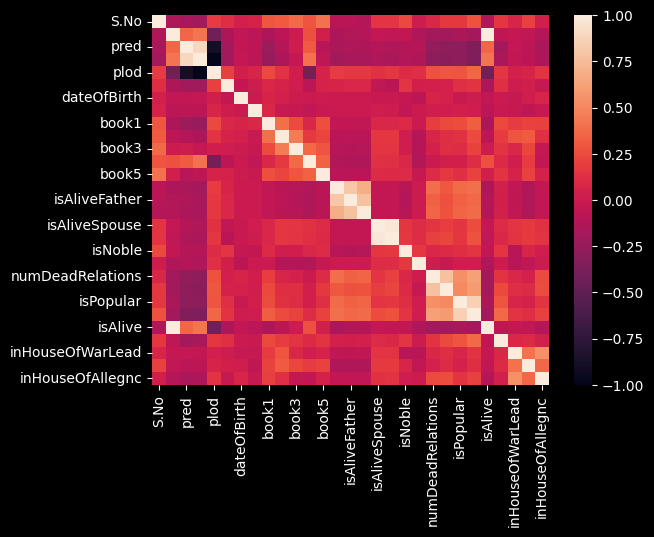

In [105]:
# Heatmap of numerical feature in the training dataset
num_features = char.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()
sb.heatmap(data=corr_mat)

In [ ]:
# drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
# cols_dlt = ['actual', 'alive', 'name', 'plod', 'pred', 'isAlive', 'DateoFdeath', 'age', 'spouse', 'dateOfBirth', 'episodes', 'S.No']

# preds_partial = preds[['S.No',
#                       'male',
#                       'dateOfBirth',
#                       'book1',
#                       'book4',
#                       'numDeadRelations',
#                       'boolDeadRelations',
#                       'popularity',
#                       'showOnly',
#                       'houseDeathRate']]

In [84]:

char1 = char_pred.copy()
# Factorize our categorical features
char1.loc[:, "title"] = pd.factorize(char1["title"])[0]
char1
# char1.loc[:, "culture"] = pd.factorize(char1["culture"])[0]
# char1.loc[:, "mother"] = pd.factorize(char1["mother"])[0]
# char1.loc[:, "father"] = pd.factorize(char1["father"])[0]
# char1.loc[:, "heir"] = pd.factorize(char1["heir"])[0]
# char1.loc[:, "house"] = pd.factorize(char1["house"])[0]
# char1.loc[:, "spouse"] = pd.factorize(char1["spouse"])[0]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,-1,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,0,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,1,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,2,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,3,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,-1,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,-1,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
